# Fitting a Distribution to Runners Data 

### Video: The Main Ideas behind Probability Distributions
link: https://www.youtube.com/watch?v=oI3hZJqXJuc

In [2]:
# Imports
import pandas as pd, numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# Set the parameters for the normal distribution
mean_height = 175  # average height in cm
std_dev_height = 10  # standard deviation in cm
num_observations = 100

# Generate the normally distributed data for marathon runners' heights
heights = np.random.normal(mean_height, std_dev_height, num_observations)

# Create a DataFrame to store the observations
runners_data = pd.DataFrame({
    'Runner_ID': range(1, num_observations + 1),
    'Height_cm': heights
})
# Set ID as index
runners_data.set_index('Runner_ID', inplace=True)
# Observe the data
runners_data.describe()


,Height_cm
count,100.000000
mean,175.578430
std,10.399319
min,144.052341
25%,168.850720
50%,175.273847
75%,182.196192
max,207.488446


In [4]:
# Example values to calculate probabilities for
xs = [148.9, 160.0, 188.5, 210.0]

In [5]:
# Turn the values into a list
data = list(runners_data['Height_cm'])

In [6]:
data

[192.89186073605458,
 168.28211016904166,
 171.60965886339835,
 173.94860390836996,
 168.57016519654104,
 184.50743121550502,
 177.01857529349098,
 191.43577813352098,
 179.73663789847916,
 176.93664778903187,
 179.6129427242475,
 170.48336784129117,
 174.43100675492772,
 178.8525383036494,
 185.26641018692195,
 186.88347951203713,
 159.1062755618278,
 175.08554294421677,
 173.07495604309725,
 182.82039117551724,
 165.97045109077072,
 168.09959007172543,
 163.24304738161769,
 172.34221575514638,
 168.94423778958324,
 176.5343481677196,
 186.420655454547,
 175.18942300349894,
 178.24662561362794,
 167.75412537560038,
 175.60755053104566,
 172.35299952257475,
 155.0436152115507,
 175.61031953785323,
 154.386349757309,
 158.70704568993642,
 183.29533025800515,
 165.23431580781306,
 167.98267059199478,
 181.8399462834656,
 181.50700967485997,
 180.03857446848755,
 175.46315475103216,
 165.69114635200884,
 184.20822816326745,
 207.48844601941306,
 159.79919833918422,
 169.30625667990674,
 1

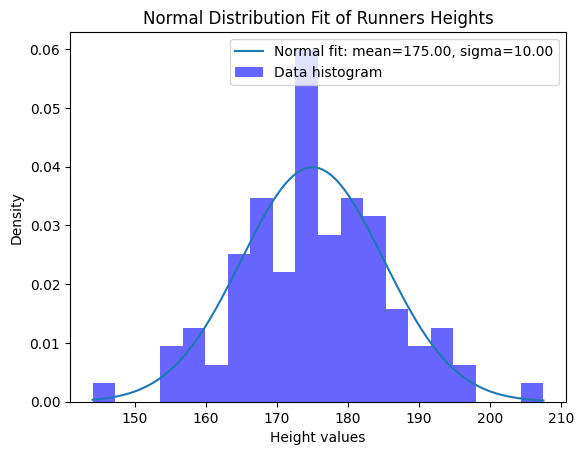

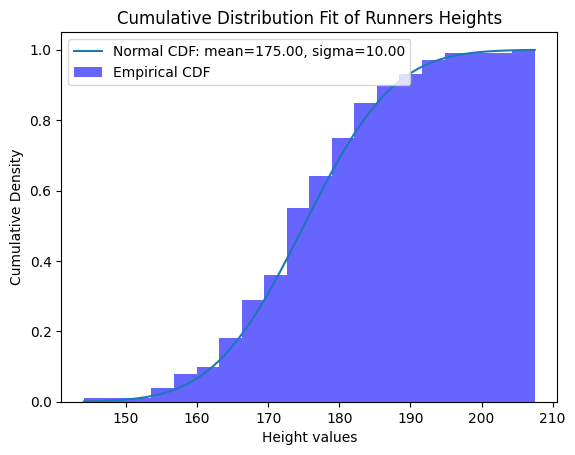

Calculations for x-value: 148.9
P(X <= 148.9) = 0.00
P(X > 148.9) = 1.00
PDF at X = 148.9 = 0.00

Calculations for x-value: 160.0
P(X <= 160.0) = 0.07
P(X > 160.0) = 0.93
PDF at X = 160.0 = 0.01

Calculations for x-value: 188.5
P(X <= 188.5) = 0.91
P(X > 188.5) = 0.09
PDF at X = 188.5 = 0.02

Calculations for x-value: 210.0
P(X <= 210.0) = 1.00
P(X > 210.0) = 0.00
PDF at X = 210.0 = 0.00



In [7]:
# Create evenly spaced x values for the distributions
x_vals = np.linspace(min(data), max(data), 1000)

# Create values for the probability density function and for the cumulativ density function
pdf_vals = stats.norm.pdf(x_vals, mean_height, std_dev_height)
cdf_vals = stats.norm.cdf(x_vals, mean_height, std_dev_height) 

# Plot the PDF 
plt.plot(x_vals, pdf_vals, label=f'Normal fit: mean={mean_height:.2f}, sigma={std_dev_height:.2f}')
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Data histogram')
plt.title('Normal Distribution Fit of Runners Heights')
plt.xlabel('Height values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot the CDF
plt.plot(x_vals, cdf_vals, label=f'Normal CDF: mean={mean_height:.2f}, sigma={std_dev_height:.2f}')
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', cumulative=True, label='Empirical CDF')
plt.title('Cumulative Distribution Fit of Runners Heights')
plt.xlabel('Height values')
plt.ylabel('Cumulative Density')
plt.legend()
plt.show()

for x in xs:

    print(f'Calculations for x-value: {x}')
    # CDF: P(X <= x)
    cdf_value = stats.norm.cdf(x, mean_height, std_dev_height)
    print(f"P(X <= {x}) = {cdf_value:.2f}")

    # 1 - CDF: P(X > x)
    cdf_complement = 1 - cdf_value
    print(f"P(X > {x}) = {cdf_complement:.2f}")

    # PDF: Probability Density at X = x
    pdf_value = stats.norm.pdf(x, mean_height, std_dev_height)
    print(f"PDF at X = {x} = {pdf_value:.2f}")

    print()